## Scaling Law Ananlysis

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

experiment_16 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/16d.csv')
experiment_32 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/32d.csv')
experiment_64 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/64d.csv')
experiment_96 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/96d.csv')
experiment_128 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/128d.csv')
experiment_16_sgd_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_SGD/16d_123_sgd.csv')
experiment_24_sgd_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_SGD/24d_123_sgd.csv')
experiment_32_sgd_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_SGD/32d_123_sgd.csv')
experiment_48_sgd_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_SGD/48d_123_sgd.csv')
experiment_64_sgd_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_SGD/64d_123_sgd.csv')

#read the last line of each experiment
last_line_16 = experiment_16.iloc[-1]
last_line_32 = experiment_32.iloc[-1]
last_line_64 = experiment_64.iloc[-1]
last_line_96 = experiment_96.iloc[-1]
last_line_128 = experiment_128.iloc[-1]
last_line_16_sgd_123 = experiment_16_sgd_123.iloc[-1]
last_line_24_sgd_123 = experiment_24_sgd_123.iloc[-1]
last_line_32_sgd_123 = experiment_32_sgd_123.iloc[-1]
last_line_48_sgd_123 = experiment_48_sgd_123.iloc[-1]
last_line_64_sgd_123 = experiment_64_sgd_123.iloc[-1]

#print the last line of each experiment
print(last_line_32)
print(last_line_64)
print(last_line_128)








step                    7.500000e+02
training_loss           5.686300e+00
validation_loss         5.576600e+00
total_flops_profiler    3.030000e+13
Name: 269, dtype: float64
step                    1.650000e+03
training_loss           4.640900e+00
validation_loss         4.628200e+00
total_flops_profiler    1.380000e+14
Name: 568, dtype: float64
step                    3.250000e+03
training_loss           4.116800e+00
validation_loss         4.203100e+00
total_flops_profiler    6.400000e+14
Name: 1119, dtype: float64


In [84]:
final_val_loss_sgd_123 = [last_line_16_sgd_123['validation_loss'], last_line_24_sgd_123['validation_loss'], last_line_32_sgd_123['validation_loss'], last_line_48_sgd_123['validation_loss'], last_line_64_sgd_123['validation_loss']]
final_compute_sgd_123 = [last_line_16_sgd_123['total_flops_profiler'], last_line_24_sgd_123['total_flops_profiler'], last_line_32_sgd_123['total_flops_profiler'], last_line_48_sgd_123['total_flops_profiler'], last_line_64_sgd_123['total_flops_profiler']]

print(final_val_loss_sgd_123)
print(final_compute_sgd_123)







[10.5324, 9.9435, 9.3397, 8.2528, 8.0973]
[6970000000000.0, 16600000000000.0, 30300000000000.0, 74400000000000.0, 138000000000000.0]


[6.8202, 5.5766, 4.6282, 4.3149, 4.2031]
Power law fit: y = 7.9330e+02 * x^(-0.1713)


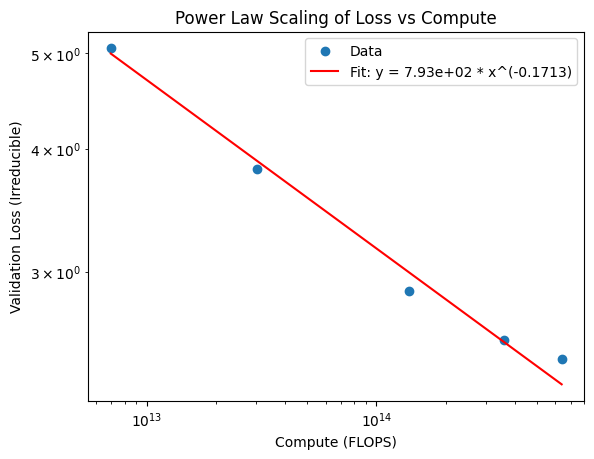

In [48]:
#plot of compute vs validation loss for each experiment and fit a power law

final_val_loss = [last_line_16['validation_loss'], last_line_32['validation_loss'], last_line_64['validation_loss'], last_line_96['validation_loss'], last_line_128['validation_loss']]
final_compute = [last_line_16['total_flops_profiler'], last_line_32['total_flops_profiler'], last_line_64['total_flops_profiler'], last_line_96['total_flops_profiler'], last_line_128['total_flops_profiler']]

print(final_val_loss)
final_val_loss_irreducible = [val - 1.76 for val in final_val_loss]

# Fit a power law: y = a * x^b
import numpy as np
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

# Convert to numpy arrays
x_data = np.array(final_compute)
y_data = np.array(final_val_loss_irreducible)

# Fit the power law
params, covariance = curve_fit(power_law, x_data, y_data)
a, b = params
print(f"Power law fit: y = {a:.4e} * x^({b:.4f})")

# Generate fitted curve for plotting
x_fit = np.logspace(np.log10(min(x_data)), np.log10(max(x_data)), 100)
y_fit = power_law(x_fit, a, b)

# Plot the data and the fit
plt.scatter(final_compute, final_val_loss_irreducible, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {a:.2e} * x^({b:.4f})')
plt.xlabel('Compute (FLOPS)')
plt.ylabel('Validation Loss (Irreducible)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Power Law Scaling of Loss vs Compute')
plt.show()

## Scaling Law With Non-Rotary 

step                    3.500000e+02
training_loss           7.418200e+00
validation_loss         7.457100e+00
total_flops_profiler    6.970000e+12
Name: 133, dtype: float64
step                    7.500000e+02
training_loss           6.582400e+00
validation_loss         6.421300e+00
total_flops_profiler    3.030000e+13
Name: 269, dtype: float64
step                    1.650000e+03
training_loss           5.206800e+00
validation_loss         5.163200e+00
total_flops_profiler    1.380000e+14
Name: 568, dtype: float64
step                    2.650000e+03
training_loss           4.674000e+00
validation_loss         4.678500e+00
total_flops_profiler    3.570000e+14
Name: 915, dtype: float64
Power law fit: y = 8.8349e+02 * x^(-0.1701)


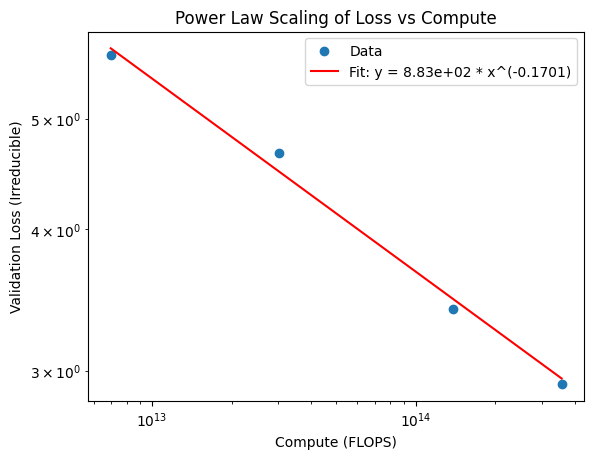

In [50]:
experiment_16_no_rotary = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary/16d_no_rotary.csv')
experiment_32_no_rotary = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary/32d_no_rotary.csv')
experiment_64_no_rotary = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary/64d_no_rotary.csv')
experiment_96_no_rotary = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary/96d_no_rotary.csv')

last_line_16_no_rotary = experiment_16_no_rotary.iloc[-1]
last_line_32_no_rotary = experiment_32_no_rotary.iloc[-1]
last_line_64_no_rotary = experiment_64_no_rotary.iloc[-1]
last_line_96_no_rotary = experiment_96_no_rotary.iloc[-1]

print(last_line_16_no_rotary)
print(last_line_32_no_rotary)
print(last_line_64_no_rotary)
print(last_line_96_no_rotary)


final_val_loss = [last_line_16_no_rotary['validation_loss'], last_line_32_no_rotary['validation_loss'], last_line_64_no_rotary['validation_loss'], last_line_96_no_rotary['validation_loss']]
final_compute = [last_line_16_no_rotary['total_flops_profiler'], last_line_32_no_rotary['total_flops_profiler'], last_line_64_no_rotary['total_flops_profiler'], last_line_96_no_rotary['total_flops_profiler']]


import numpy as np
from scipy.optimize import curve_fit


final_compute = final_compute
final_val_loss_irreducible = final_val_loss
final_val_loss_irreducible = [val - 1.76 for val in final_val_loss_irreducible]

def power_law(x, a, b):
    return a * np.power(x, b)
#fit a power law to the data
x_data = np.array(final_compute)
y_data = np.array(final_val_loss_irreducible)

# Fit the power law
params, covariance = curve_fit(power_law, x_data, y_data)
a, b = params
print(f"Power law fit: y = {a:.4e} * x^({b:.4f})")

# Generate fitted curve for plotting
x_fit = np.logspace(np.log10(min(x_data)), np.log10(max(x_data)), 100)
y_fit = power_law(x_fit, a, b)



plt.scatter(final_compute, final_val_loss_irreducible, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {a:.2e} * x^({b:.4f})')
plt.xlabel('Compute (FLOPS)')
plt.ylabel('Validation Loss (Irreducible)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Power Law Scaling of Loss vs Compute')
plt.show()





## Compute Multiplier Over Scale

2.1593633018895386 3.6629739013223492 3.036162012039098 2.3726430781413566


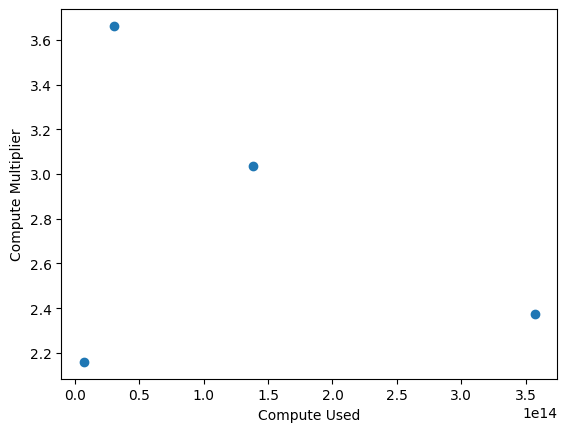

In [55]:

def compute_multiplier(loss_1, loss_2, irreducible = 1.76):
    compute_effect = 0.154
    diff = np.log(loss_1-irreducible)-np.log(loss_2-irreducible)
    return np.exp(diff/compute_effect)



compute_multiplier_16 = compute_multiplier(last_line_16_no_rotary['validation_loss'],last_line_16['validation_loss'])
compute_multiplier_32 = compute_multiplier(last_line_32_no_rotary['validation_loss'],last_line_32['validation_loss'])
compute_multiplier_64 = compute_multiplier(last_line_64_no_rotary['validation_loss'],last_line_64['validation_loss'])
compute_multiplier_96 = compute_multiplier(last_line_96_no_rotary['validation_loss'],last_line_96['validation_loss'])


print(compute_multiplier_16, compute_multiplier_32, compute_multiplier_64, compute_multiplier_96)
#graph compute multiplier vs compute used
compute_multipliers = [compute_multiplier_16, compute_multiplier_32, compute_multiplier_64, compute_multiplier_96]

plt.scatter(final_compute, compute_multipliers)
plt.xlabel('Compute Used')
plt.ylabel('Compute Multiplier')
plt.show()




## Second Seed Experiments

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

experiment_16_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/16d_123.csv')
experiment_24_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/24d_123.csv')
experiment_32_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/32d_123.csv')
experiment_64_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/64d_123.csv')
experiment_96_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/96d_123.csv')


#read the last line of each experiment
last_line_16_123 = experiment_16_123.iloc[-1]
last_line_24_123 = experiment_24_123.iloc[-1]
last_line_32_123 = experiment_32_123.iloc[-1]
last_line_64_123 = experiment_64_123.iloc[-1]
last_line_96_123 = experiment_96_123.iloc[-1]




[6.8265, 5.8276, 5.5562, 4.6333, 4.3181]
Power law fit: y = 9.4426e+02 * x^(-0.1776)


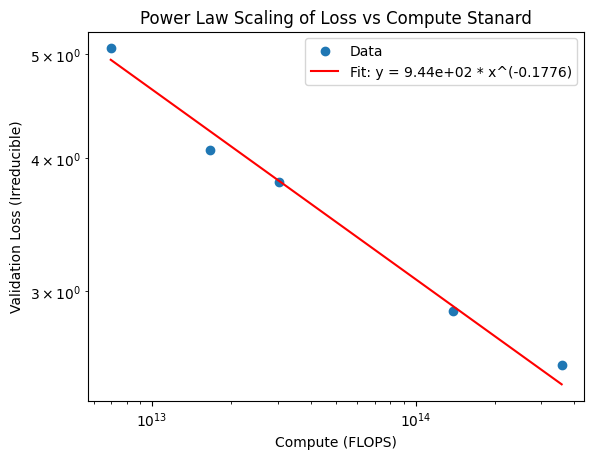

In [79]:
#plot of compute vs validation loss for each experiment and fit a power law

final_val_loss = [last_line_16_123['validation_loss'], last_line_24_123['validation_loss'], last_line_32_123['validation_loss'], last_line_64_123['validation_loss'], last_line_96_123['validation_loss']]
final_compute = [last_line_16_123['total_flops_profiler'], last_line_24_123['total_flops_profiler'], last_line_32_123['total_flops_profiler'], last_line_64_123['total_flops_profiler'], last_line_96_123['total_flops_profiler']]

print(final_val_loss)
final_val_loss_irreducible_standard_123 = [val - 1.76 for val in final_val_loss]

# Fit a power law: y = a * x^b
import numpy as np
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

# Convert to numpy arrays
x_data_standard_123 = np.array(final_compute)

y_data_standard_123 = np.array(final_val_loss_irreducible_standard_123)

# Fit the power law
params, covariance = curve_fit(power_law, x_data_standard_123, y_data_standard_123)
a, b = params
print(f"Power law fit: y = {a:.4e} * x^({b:.4f})")

# Generate fitted curve for plotting
x_fit_standard_123 = np.logspace(np.log10(min(x_data_standard_123)), np.log10(max(x_data_standard_123)), 100)
y_fit_standard_123 = power_law(x_fit_standard_123, a, b)

# Plot the data and the fit
plt.scatter(final_compute, final_val_loss_irreducible_standard_123, label='Data')
plt.plot(x_fit_standard_123, y_fit_standard_123, 'r-', label=f'Fit: y = {a:.2e} * x^({b:.4f})')
plt.xlabel('Compute (FLOPS)')
plt.ylabel('Validation Loss (Irreducible)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Power Law Scaling of Loss vs Compute Stanard')
plt.show()

step                    3.500000e+02
training_loss           7.422900e+00
validation_loss         7.453900e+00
total_flops_profiler    6.970000e+12
Name: 133, dtype: float64
step                    7.500000e+02
training_loss           6.202400e+00
validation_loss         6.273600e+00
total_flops_profiler    3.030000e+13
Name: 269, dtype: float64
step                    1.650000e+03
training_loss           5.130300e+00
validation_loss         5.104000e+00
total_flops_profiler    1.380000e+14
Name: 575, dtype: float64
step                    2.650000e+03
training_loss           4.451600e+00
validation_loss         4.619600e+00
total_flops_profiler    3.570000e+14
Name: 915, dtype: float64
Power law fit: y = 1.1442e+03 * x^(-0.1786)
Power law fit: y = 2.8544e+02 * x^(-0.1173)
[6.97000000e+12 7.25270149e+12 7.54686928e+12 7.85296844e+12
 8.17148291e+12 8.50291624e+12 8.84779244e+12 9.20665672e+12
 9.58007646e+12 9.96864200e+12 1.03729677e+13 1.07936927e+13
 1.12314822e+13 1.16870284e+13 1.

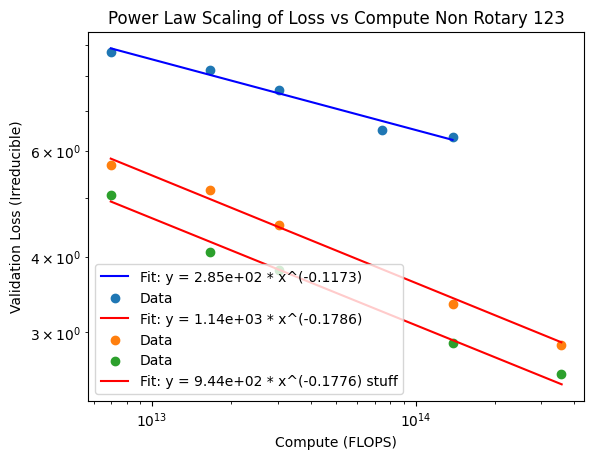

In [97]:
experiment_16_no_rotary_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary_123/16d_no_rotary_123.csv')
experiment_32_no_rotary_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary_123/32d_no_rotary_123.csv')
experiment_24_no_rotary_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary_123/24d_no_rotary_123.csv')
experiment_64_no_rotary_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary_123/64d_no_rotary_123.csv')
experiment_96_no_rotary_123 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling_No_Rotary_123/96d_no_rotary_123.csv')

last_line_16_no_rotary_123 = experiment_16_no_rotary_123.iloc[-1]
last_line_24_no_rotary_123 = experiment_24_no_rotary_123.iloc[-1]
last_line_32_no_rotary_123 = experiment_32_no_rotary_123.iloc[-1]
last_line_64_no_rotary_123 = experiment_64_no_rotary_123.iloc[-1]
last_line_96_no_rotary_123 = experiment_96_no_rotary_123.iloc[-1]

print(last_line_16_no_rotary_123)
print(last_line_32_no_rotary_123)
print(last_line_64_no_rotary_123)
print(last_line_96_no_rotary_123)


final_val_loss = [last_line_16_no_rotary_123['validation_loss'], last_line_24_no_rotary_123['validation_loss'], last_line_32_no_rotary_123['validation_loss'], last_line_64_no_rotary_123['validation_loss'], last_line_96_no_rotary_123['validation_loss']]
final_compute = [last_line_16_no_rotary_123['total_flops_profiler'], last_line_24_no_rotary_123['total_flops_profiler'], last_line_32_no_rotary_123['total_flops_profiler'], last_line_64_no_rotary_123['total_flops_profiler'], last_line_96_no_rotary_123['total_flops_profiler']]


import numpy as np
from scipy.optimize import curve_fit


final_compute = final_compute
final_val_loss_irreducible = final_val_loss
final_val_loss_irreducible = [val - 1.76 for val in final_val_loss_irreducible]

def power_law(x, a, b):
    return a * np.power(x, b)
#fit a power law to the data
x_data = np.array(final_compute)
y_data = np.array(final_val_loss_irreducible)

# Fit the power law
params, covariance = curve_fit(power_law, x_data, y_data)
a_no_rotary, b_no_rotary = params
print(f"Power law fit: y = {a_no_rotary:.4e} * x^({b_no_rotary:.4f})")

# Generate fitted curve for plotting
x_fit_no_rotary_123 = np.logspace(np.log10(min(x_data)), np.log10(max(x_data)), 100)
y_fit_no_rotary_123 = power_law(x_fit_no_rotary_123, a_no_rotary, b_no_rotary)


#now stuff without sgd
final_val_loss_irreducible_sgd_123 = [val - 1.76 for val in final_val_loss_sgd_123]
x_data_sgd_123 = np.array(final_compute_sgd_123)
y_data_sgd_123 = np.array(final_val_loss_irreducible_sgd_123)
params, covariance = curve_fit(power_law, x_data_sgd_123, y_data_sgd_123)
a_sgd_123, b_sgd_123 = params
print(f"Power law fit: y = {a_sgd_123:.4e} * x^({b_sgd_123:.4f})")
x_fit_sgd_123 = np.logspace(np.log10(min(x_data_sgd_123)), np.log10(max(x_data_sgd_123)), 100)
y_fit_sgd_123 = power_law(x_fit_sgd_123, a_sgd_123, b_sgd_123)
plt.plot(x_fit_sgd_123, y_fit_sgd_123, 'b-', label=f'Fit: y = {a_sgd_123:.2e} * x^({b_sgd_123:.4f})')
plt.scatter(final_compute_sgd_123, final_val_loss_irreducible_sgd_123, label='Data')

print(x_fit_no_rotary_123)
print(y_fit_no_rotary_123)
plt.plot(x_fit_no_rotary_123, y_fit_no_rotary_123, 'r-', label=f'Fit: y = {a_no_rotary:.2e} * x^({b_no_rotary:.4f})')


plt.scatter(final_compute, final_val_loss_irreducible, label='Data')
plt.scatter(final_compute, final_val_loss_irreducible_standard_123, label='Data')
plt.plot(x_fit_standard_123, y_fit_standard_123, 'r-', label=f'Fit: y = {a:.2e} * x^({b:.4f}) stuff')
plt.xlabel('Compute (FLOPS)')
plt.ylabel('Validation Loss (Irreducible)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Power Law Scaling of Loss vs Compute Non Rotary 123')
plt.show()





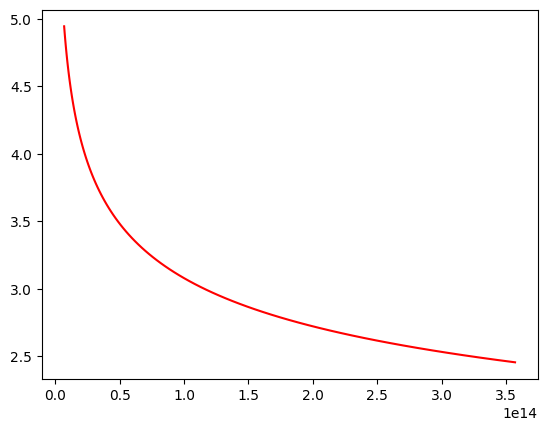

In [92]:
plt.plot(x_fit_no_rotary_123, y_fit_no_rotary_123, 'r-', label=f'Fit: y = {a_no_rotary:.2e} * x^({b_no_rotary:.4f})')

2.13418662099451 4.776328680230625 3.0771080971183773 2.678098811865548 2.06160900816423


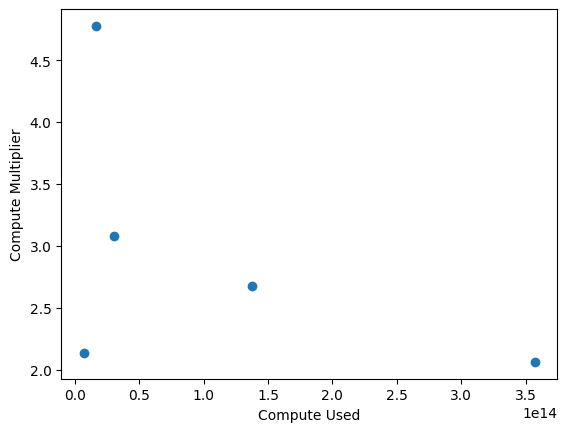

In [74]:

def compute_multiplier(loss_1, loss_2, irreducible = 1.76):
    compute_effect = 0.154
    diff = np.log(loss_1-irreducible)-np.log(loss_2-irreducible)
    return np.exp(diff/compute_effect)



compute_multiplier_16_123 = compute_multiplier(last_line_16_no_rotary_123['validation_loss'],last_line_16_123['validation_loss'])
compute_multiplier_24_123 = compute_multiplier(last_line_24_no_rotary_123['validation_loss'],last_line_24_123['validation_loss'])
compute_multiplier_32_123 = compute_multiplier(last_line_32_no_rotary_123['validation_loss'],last_line_32_123['validation_loss'])
compute_multiplier_64_123 = compute_multiplier(last_line_64_no_rotary_123['validation_loss'],last_line_64_123['validation_loss'])
compute_multiplier_96_123 = compute_multiplier(last_line_96_no_rotary_123['validation_loss'],last_line_96_123['validation_loss'])


print(compute_multiplier_16_123, compute_multiplier_24_123, compute_multiplier_32_123, compute_multiplier_64_123, compute_multiplier_96_123)
#graph compute multiplier vs compute used
compute_multipliers_123 = [compute_multiplier_16_123, compute_multiplier_24_123, compute_multiplier_32_123, compute_multiplier_64_123, compute_multiplier_96_123]

plt.scatter(final_compute, compute_multipliers_123)
plt.xlabel('Compute Used')
plt.ylabel('Compute Multiplier')
plt.show()


